In [10]:
import numpy as np
import pandas as pd
import pymongo
import seaborn as sns
from sklearn.manifold import TSNE
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.metrics import log_loss

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

In [3]:
X_train_db = myclient["bibtex_train"]["features"]
y_train_db = myclient["bibtex_train"]["labels"]

In [4]:
X_train= []
X_train_docs = X_train_db.find({})
for doc in X_train_docs:
    X_train.append(doc)
X_train = pd.DataFrame(X_train, index=[x["_id"] for x in X_train])
X_train.drop(["_id"],axis=1,inplace=True)

In [5]:
y_train= []
y_train_docs = y_train_db.find({})
for doc in y_train_docs:
    y_train.append(doc)
y_train = pd.DataFrame(y_train, index=[x["_id"] for x in y_train])
y_train.drop(["_id"],axis=1,inplace=True)

In [25]:
## 遍历所有 label 组合
y_train_unique = np.unique(y_train.to_numpy().astype(int),axis=0)

/Users/phlin/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/phlin/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='v2'>

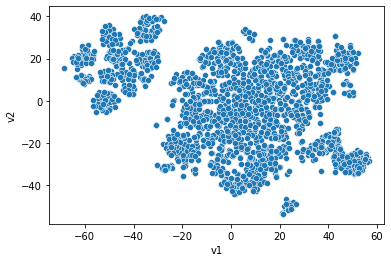

In [28]:
t_sne = TSNE()
t_sne.fit(y_train_unique)
t_sne_df = pd.DataFrame(t_sne.embedding_)
t_sne_df.columns=["v1","v2"]
sns.scatterplot(data=t_sne_df, x="v1", y="v2",palette="tab10")

In [24]:
sw = stopwords.words('english')
tobedrop = set(X_train.columns) & set(sw)
X_train.drop(columns=tobedrop,inplace=True)

In [27]:
X_train = X_train[X_train.sum().sort_values(ascending=False)[:400].index]

In [57]:
dot = np.empty([len(y_train.columns),len(X_train.columns)])
for col, feat in enumerate(X_train.columns):
    for row, labl in enumerate(y_train.columns):
        dot[row][col] = np.dot(X_train[feat].to_numpy(), y_train[labl].to_numpy())
dot = pd.DataFrame(dot, index=y_train.columns, columns=X_train.columns)

<AxesSubplot:>

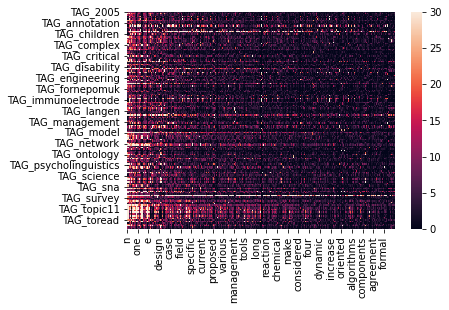

In [60]:
sns.heatmap(dot,vmin=0,vmax=30)

In [51]:
for col, feat in list(X_train.columns):
    print(col)

ValueError: not enough values to unpack (expected 2, got 1)

In [61]:
X_train_db.find_one({})

{'_id': '340e20c8',
 '0': 1.0,
 '000': 0.0,
 '02': 0.0,
 '05': 0.0,
 '06': 0.0,
 '1': 1.0,
 '10': 1.0,
 '100': 0.0,
 '11': 0.0,
 '12': 0.0,
 '13': 0.0,
 '14': 0.0,
 '15': 0.0,
 '16': 0.0,
 '17': 0.0,
 '18': 0.0,
 '1997': 0.0,
 '1998': 0.0,
 '1999': 0.0,
 '2': 0.0,
 '20': 1.0,
 '2000': 0.0,
 '2001': 0.0,
 '2002': 0.0,
 '2003': 0.0,
 '2004': 0.0,
 '2005': 0.0,
 '2006': 0.0,
 '2007': 0.0,
 '24': 0.0,
 '25': 0.0,
 '3': 0.0,
 '30': 0.0,
 '4': 1.0,
 '40': 0.0,
 '5': 1.0,
 '50': 0.0,
 '6': 1.0,
 '60': 0.0,
 '7': 1.0,
 '8': 0.0,
 '9': 0.0,
 '95': 0.0,
 '98': 0.0,
 'a': 1.0,
 'ab': 0.0,
 'ability': 0.0,
 'able': 0.0,
 'about': 0.0,
 'above': 0.0,
 'absence': 0.0,
 'abstract': 0.0,
 'academic': 0.0,
 'access': 0.0,
 'accessible': 0.0,
 'according': 0.0,
 'account': 0.0,
 'accuracy': 0.0,
 'accurate': 0.0,
 'achieve': 0.0,
 'achieved': 0.0,
 'acid': 0.0,
 'acids': 0.0,
 'acm': 0.0,
 'acquisition': 0.0,
 'across': 0.0,
 'act': 0.0,
 'action': 0.0,
 'activation': 0.0,
 'active': 0.0,
 'activities':

In [12]:
## 计算每个 feature 对每个 label 的 cross-entropy
echart_data = []
for feat in X_train.columns:
    for labl in y_train.columns:
        echart_data.append({"feautre": feat, "label": labl, "dot": np.dot(X_train[feat].to_numpy(), y_train[labl].to_numpy())})
echart_data = pd.DataFrame(echart_data).sort_values("dot")

In [14]:
echart_data = echart_data.tail(1000)

In [18]:
set(echart_data["feautre"])

{'0',
 '1',
 '2',
 '2005',
 '2006',
 '2007',
 '3',
 '4',
 '6',
 'a',
 'ab',
 'abstract',
 'all',
 'allows',
 'also',
 'american',
 'an',
 'analysis',
 'and',
 'antibodies',
 'antibody',
 'apo',
 'apolipoprotein',
 'approach',
 'are',
 'as',
 'assay',
 'at',
 'b',
 'based',
 'basis',
 'be',
 'been',
 'behavior',
 'betta',
 'between',
 'bond',
 'book',
 'both',
 'but',
 'by',
 'c',
 'calculated',
 'calculations',
 'can',
 'carlo',
 'case',
 'chemical',
 'chemistry',
 'complex',
 'conditions',
 'conference',
 'consider',
 'correlation',
 'critical',
 'd',
 'data',
 'density',
 'described',
 'design',
 'detection',
 'developed',
 'dft',
 'different',
 'dimensional',
 'discuss',
 'distribution',
 'due',
 'dynamical',
 'dynamics',
 'e',
 'each',
 'effect',
 'effects',
 'electrochemical',
 'electrode',
 'electronic',
 'energies',
 'energy',
 'engineering',
 'enzyme',
 'equation',
 'equations',
 'equilibrium',
 'even',
 'evolution',
 'experimental',
 'experiments',
 'f',
 'field',
 'fighting',

In [19]:
echart_data.values.tolist()

[['that', 'TAG_information', 66.0],
 ['of', 'TAG_toread', 66.0],
 ['of', 'TAG_amperometry', 66.0],
 ['research', 'TAG_learning', 66.0],
 ['the', 'TAG_amperometry', 67.0],
 ['a', 'TAG_community', 67.0],
 ['that', 'TAG_semantic', 67.0],
 ['n', 'TAG_book', 67.0],
 ['this', 'TAG_information', 67.0],
 ['male', 'TAG_bettasplendens', 67.0],
 ['carlo', 'TAG_statphys23', 67.0],
 ['the', 'TAG_review', 67.0],
 ['in', 'TAG_2006', 67.0],
 ['physics', 'TAG_model', 67.0],
 ['n', 'TAG_review', 67.0],
 ['and', 'TAG_2006', 67.0],
 ['for', 'TAG_computer', 67.0],
 ['type', 'TAG_statphys23', 67.0],
 ['for', 'TAG_systems', 67.0],
 ['for', 'TAG_methodology', 67.0],
 ['we', 'TAG_ontology', 67.0],
 ['monte', 'TAG_statphys23', 67.0],
 ['developed', 'TAG_immunoassay', 67.0],
 ['abstract', 'TAG_model', 67.0],
 ['glass', 'TAG_statphys23', 67.0],
 ['model', 'TAG_dynamics', 67.0],
 ['transitions', 'TAG_statphys23', 67.0],
 ['and', 'TAG_cognition', 67.0],
 ['networks', 'TAG_network', 67.0],
 ['for', 'TAG_topic10', 67